In [2]:
!pip install tensorflow keras pillow numpy

In [6]:
!pip install opencv-python

import cv2


     -------------------------------------- 38.2/38.2 MB 241.2 kB/s eta 0:00:00


In [1]:
import keras
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from math import log10,sqrt

In [2]:
import os
import glob as gb
dataset_dir='C:/Users/user/Desktop/MAIN PROJECT/Medical'
for folder in os.listdir(dataset_dir):
    files = gb.glob(pathname= str(dataset_dir+ '/'+ folder + '/*.jpg'))

    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 120 in folder Dataset


In [15]:
import os
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_dataset_path = 'C:/Users/user/Desktop/MAIN PROJECT/MedicalAugg'

if not os.path.exists(augmented_dataset_path):
    os.makedirs(augmented_dataset_path)

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

batch_size = 32

data_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(512, 748),
    batch_size=batch_size,
    class_mode=None,
    shuffle=True)

augmented_images = 0
while augmented_images < 10000:
    batch = data_generator.next()
    for i, image in enumerate(batch):
        if augmented_images >= 10000:
            break
        filename = os.path.join(augmented_dataset_path, f'image_{augmented_images}.jpg')
        keras.preprocessing.image.save_img(filename, image)
        augmented_images += 1

print(f'Generated {augmented_images} augmented images.')

Found 120 images belonging to 1 classes.
Generated 10000 augmented images.


In [3]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
path = 'C:/Users/user/Desktop/MAIN PROJECT/MedicalAug'
dataset_images = sorted(os.listdir(path))

Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)
Image shape (512, 748, 3)


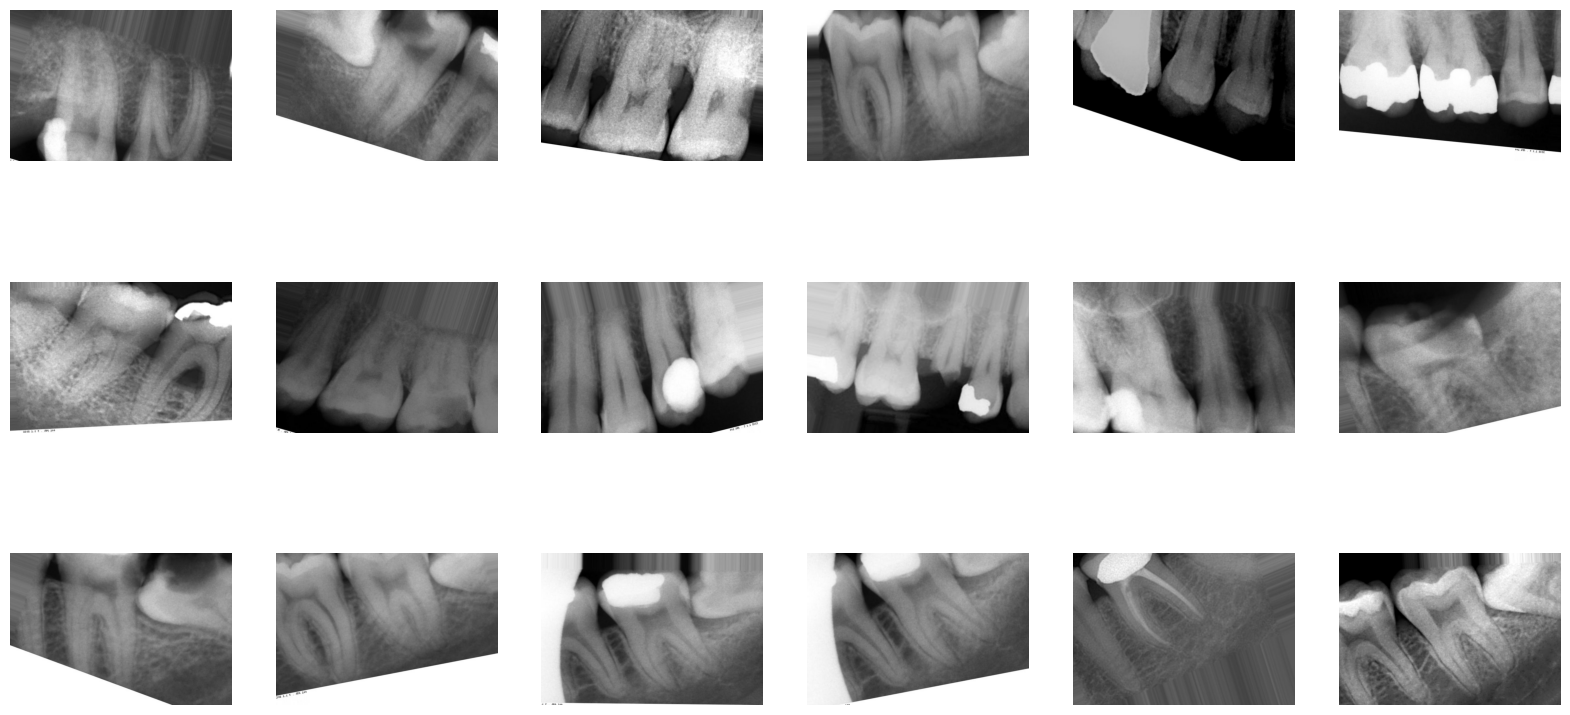

In [4]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
def view_random_image(path):
    random_image = random.sample(os.listdir(path), 1)
    img = mpimg.imread(path+'/'+random_image[0])
    plt.imshow(img)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    return img
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    img = view_random_image(path = 'C:/Users/user/Desktop/MAIN PROJECT/MedicalAug')

In [5]:
dataset_image=[]
for im in dataset_images:
    img=image.load_img('C:/Users/user/Desktop/MAIN PROJECT/MedicalAug/'+im,target_size=(120,120),color_mode='grayscale')
    img=image.img_to_array(img)
    img=img/255
    dataset_image.append(img)
dataset_df=np.array(dataset_image)

In [6]:
def plot_img(dataset):
    f,ax=plt.subplots(1,5)
    f.set_size_inches(40,20)
    for i in range(5,10):
        ax[i-5].imshow(dataset[i].reshape(120,120), cmap='gray')
    plt.show()

In [7]:
def add_noise(image):
    row,col,ch=image.shape
    mean=0
    sigma=1
    gauss=np.random.normal(mean,sigma,(row,col,ch))
    gauss=gauss.reshape(row,col,ch)
    noisy=image+gauss*0.05
    return noisy

In [8]:
noised_df=[]
for img in dataset_df:
    noisy=add_noise(img)
    noised_df.append(noisy)
noised_df=np.array(noised_df)

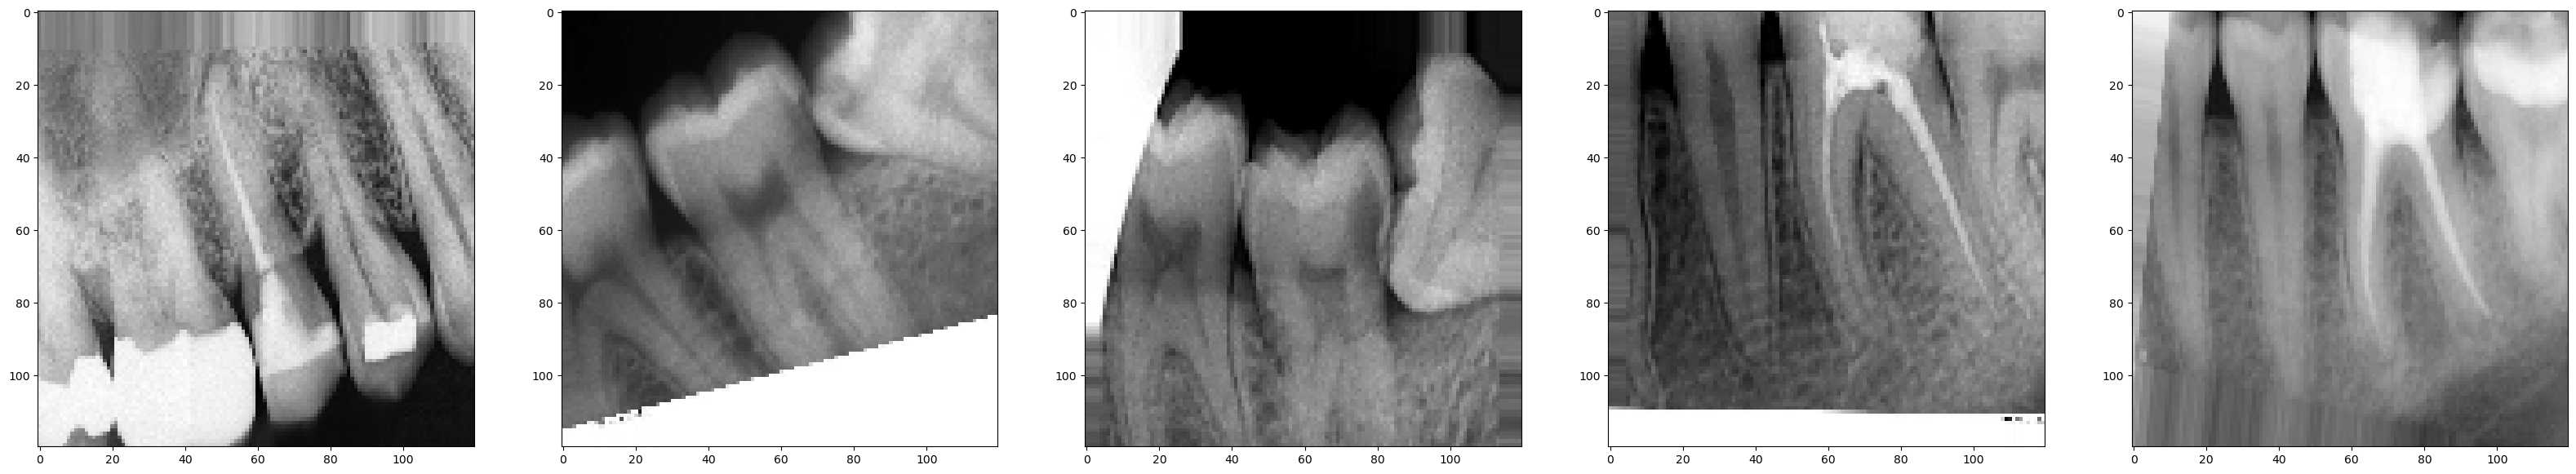

In [9]:
import matplotlib.pyplot as plt
plot_img(dataset_df)

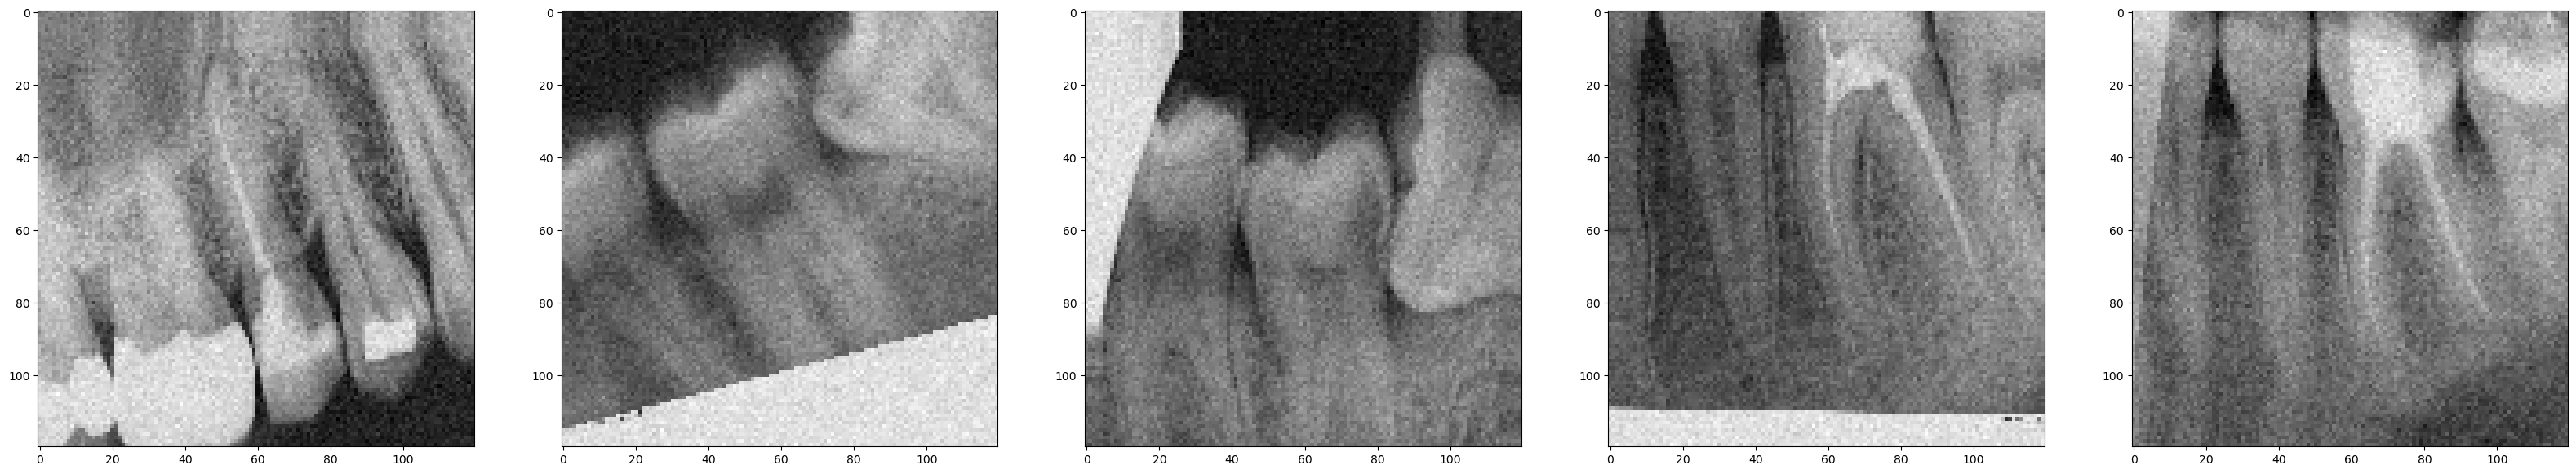

In [10]:
plot_img(noised_df)

In [11]:
x_train=dataset_df[:8000]
x_test=dataset_df[2000:]
x_train_noisy=noised_df[:8000]
x_test_noisy=noised_df[2000:]

In [12]:
input_img = Input(shape=(120, 120, 1))
# encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [13]:
# Create the autoencoder model
denoising_autoencoder = Model(input_img, decoded)

# Compile the model with Adam optimizer and Mean Squared Error loss
denoising_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

denoising_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 120, 120, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        36928 

In [ ]:
#Train the model on noisy images
denoising_autoencoder.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=64,
                validation_data=(x_test_noisy, x_test)) 

In [17]:
denoising_autoencoder.save('denoising_autoencoder_model.h5')

In [14]:
from tensorflow.keras.models import load_model
model = load_model('denoising_autoencoder_model.h5')

In [15]:
denoised_imgs = model.predict(x_test_noisy)

250/250 [==============================] - 132s 519ms/step


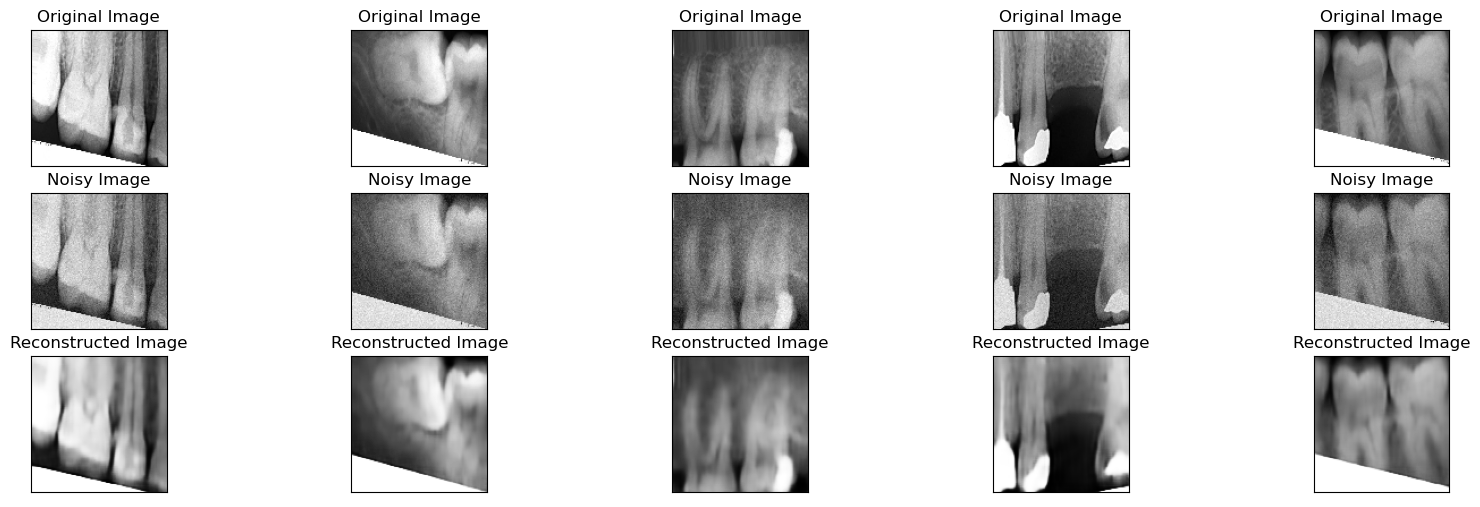

In [33]:
n = 5  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(120, 120), cmap='gray')
    plt.title('Original Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # Display noisy image
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(120, 120), cmap='gray')
    plt.title('Noisy Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(denoised_imgs[i].reshape(120, 120), cmap='gray')
    plt.title('Reconstructed Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
model.save_weights('denoising_autoencoder_weights.h5')

In [16]:
# Calculate PSNR and SSIM metrics for each test image
psnr_values = []
ssim_values = []
for i in range(len(x_test)):
    psnr_values.append(10 * log10(1 / model.evaluate(x_test_noisy[i].reshape(1,120,120,1), x_test[i].reshape(1,120,120,1), verbose=0)))
    ssim_values.append(tf.image.ssim(tf.convert_to_tensor(x_test[i]), tf.convert_to_tensor(denoised_imgs[i]), max_val=1.0))

print(f"Average PSNR: {np.mean(psnr_values)} dB")
print(f"Average SSIM: {np.mean(ssim_values)}")


Average PSNR: 29.492324011649806 dB
Average SSIM: 0.8135319948196411


In [18]:
# Load the pre-trained denoising autoencoder model
denoising_autoencoder = keras.models.load_model('denoising_autoencoder_model.h5')

# Freeze the encoder layers
for layer in denoising_autoencoder.layers[:-4]:
    layer.trainable = False

# Add new decoder layers for fine-tuning
x = denoising_autoencoder.layers[-5].output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
output_img = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the fine-tuned denoising autoencoder model
finetuned_denoising_autoencoder = Model(inputs=denoising_autoencoder.input, outputs=output_img)

# Compile the model with Adam optimizer and Mean Squared Error loss
finetuned_denoising_autoencoder.compile(optimizer='adam', loss='mse')

# Train the model on the noisy images to generate denoised images
finetuned_denoising_autoencoder.fit(x_train_noisy, x_train,
                                     epochs=15,
                                     batch_size=64,
                                     validation_data=(x_test_noisy, x_test))


Epoch 1/15
125/125 [==============================] - 466s 4s/step - loss: 0.0048 - val_loss: 0.0018
Epoch 2/15
125/125 [==============================] - 444s 4s/step - loss: 0.0017 - val_loss: 0.0016
Epoch 3/15
125/125 [==============================] - 441s 4s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 4/15
125/125 [==============================] - 440s 4s/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/15
125/125 [==============================] - 441s 4s/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/15
125/125 [==============================] - 443s 4s/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/15
125/125 [==============================] - 451s 4s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/15
125/125 [==============================] - 377s 3s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/15
125/125 [==============================] - 326s 3s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/15
125/125 [==============================] - 306s 2s/step - loss: 0.0013 - val_lo

In [19]:
finetuned_denoising_autoencoder.save('finetuned_denoising_autoencoder.h5')

In [18]:
from tensorflow.keras.models import load_model
finetuned_model = load_model('finetuned_denoising_autoencoder.h5')

In [19]:
denoised_imgs_fine = finetuned_model.predict(x_test_noisy)

250/250 [==============================] - 126s 502ms/step


In [21]:
# Calculate PSNR and SSIM metrics for each test image
psnr_values_finetune = []
ssim_values_finetune = []
for i in range(len(x_test)):
    psnr_values_finetune.append(10 * log10(1 / finetuned_model.evaluate(x_test_noisy[i].reshape(1,120,120,1), x_test[i].reshape(1,120,120,1), verbose=0)))
    ssim_values_finetune.append(tf.image.ssim(tf.convert_to_tensor(x_test[i]), tf.convert_to_tensor(denoised_imgs_fine[i]), max_val=1.0))

print(f"Average PSNR: {np.mean(psnr_values_finetune)} dB")
print(f"Average SSIM: {np.mean(ssim_values_finetune)}")

Average PSNR: 29.547580261865836 dB
Average SSIM: 0.8117685914039612


In [21]:
denoised_image_finetune = finetuned_model.predict(x_test_noisy[0].reshape(1, 120, 120, 1))

1/1 [==============================] - 0s 37ms/step


In [26]:
denoised_image = model.predict(x_test_noisy[0].reshape(1, 120, 120, 1))

1/1 [==============================] - 0s 55ms/step


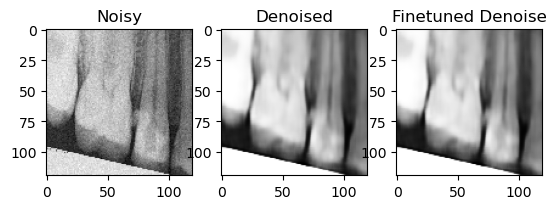

In [28]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.imshow(x_test[0].reshape(120, 120), cmap='gray')
# plt.title('Original')

plt.subplot(1, 3, 1)
plt.imshow(x_test_noisy[0].reshape(120, 120), cmap='gray')
plt.title('Noisy')

plt.subplot(1, 3, 2)
plt.imshow(denoised_image.reshape(120, 120), cmap='gray')
plt.title('Denoised')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image_finetune.reshape(120, 120), cmap='gray')
plt.title('Finetuned Denoise')

plt.show()


1/1 [==============================] - 0s 235ms/step


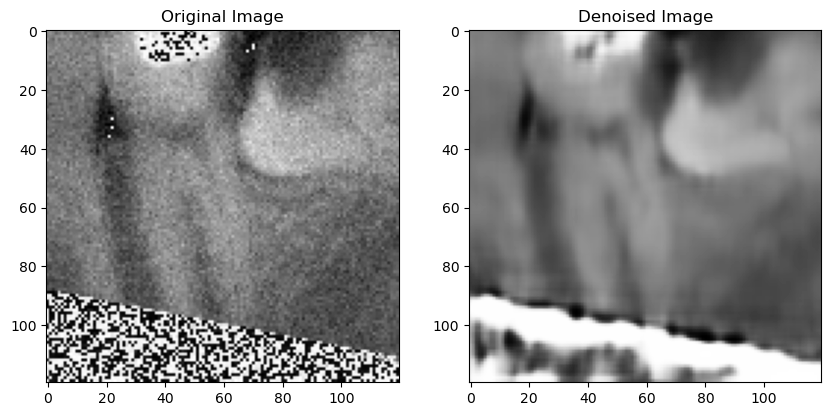

In [24]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the path to the input image
image_path = 'C:/Users/user/Desktop/MAIN PROJECT/Noisyimages/noisy_25.jpg'

# Load the input image in grayscale
input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Preprocess the input image (assuming the same preprocessing as used during training)
input_image = input_image.astype('float32') / 255.0
input_image = np.expand_dims(input_image, axis=0)
input_image = np.expand_dims(input_image, axis=3)

# Load the trained denoising autoencoder model
model = load_model('denoising_autoencoder_model.h5')

# Use the model to denoise the input image
denoised_image = model.predict(input_image)

# Rescale the denoised image from [0, 1] to [0, 255] and convert to uint8
denoised_image = (denoised_image[0, :, :, 0] * 255).astype('uint8')

# Display the original and denoised images side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(input_image[0, :, :, 0], cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(denoised_image, cmap='gray')
axs[1].set_title('Denoised Image')
plt.show()
